# **Sentiment analysis**

## **Twitter Data Sets**

In [ ]:
!pip install spacy --upgrade

In [ ]:
!python -m spacy download en_core_web_sm

In [2]:
# Installation of Necessary Library
import spacy
import en_core_web_sm
import pandas as pd
import seaborn as sns
import numpy as np
import re
import random
from google.colab import drive

In [3]:
# Connect google drive with python code and create new folder under by default folder content  
drive.mount('/content/drive')      # Content is the by default drive, under content one drive folder is created which contain my all drive data

Mounted at /content/drive


In [4]:
# Read the Twitter data from google drive
twit_data = pd.read_csv('/content/drive/MyDrive/Analysis Data /NLP/Restaurant_review.csv', header = None,
                         names = ['Sentiment','Twit_Id','Date', 'Query','User','Text'], encoding='latin1')

In [ ]:
twit_data

In [ ]:
twit_data['Sentiment'].unique()

In [ ]:
sns.countplot(twit_data['Sentiment']);

In [ ]:
np.unique(twit_data['Sentiment'], return_counts=True)

In [10]:
# drop the un necesaary Coloumn which is not required in anlysis
twit_data = twit_data.drop(['Twit_Id','Date','Query','User'],axis=1)  # axis = 1 reference column

In [ ]:
twit_data

##**Train and Test data**

**Note:** Here Our goal is take text as imput and predict the type of sentiment i.e 0 or 4

In [ ]:
X = twit_data.iloc[:, 1].values
X

In [ ]:
Y = twit_data.iloc[:, 0].values
Y

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# In orional data total 1.6 milion samples we have whish is too large to learn alogorithm so for smooth run of algo well select only 3% data
X, _, Y, _ = train_test_split(X, Y, test_size = 0.97)

**Note:** Here double '_' is given because this function will written four output 3% x train, 70% x test,3% Y train and 70% Y test.

In [ ]:
X

In [ ]:
X.shape

In [ ]:
Y

In [ ]:
Y.shape

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [ ]:
X_train.shape, Y_train.shape

In [ ]:
X_test.shape, Y_test.shape

In [ ]:
np.unique(Y_train, return_counts=True)

In [ ]:
np.unique(Y_test, return_counts=True)

##**Preprocessing the data**

In [ ]:
nlp = spacy.load('en_core_web_sm')
nlp

In [26]:
# Apply Preprocessing
def preprocessing(sentence):
  sentence = sentence.lower()
  sentence = sentence.replace('.', '')
  tokens = []
  tokens = [token.text for token in nlp(sentence) if not (token.is_stop or token.like_num or token.is_punct or token.is_space or len(token) == 1)]
  tokens = ' '.join([element for element in tokens])

  return tokens

In [ ]:
preprocessing("@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  2 You shoulda got David Carr of Third Day to do it. ;D")

In [28]:
# Remove Name from text of privious preproceesed data
def preprocessing(sentence):
  sentence = sentence.lower()
  sentence = re.sub(r"@[A-Za-z0-9]+", ' ', sentence)
  sentence = sentence.replace('.', '')
  tokens = []
  tokens = [token.text for token in nlp(sentence) if not (token.is_stop or token.like_num or token.is_punct or token.is_space or len(token) == 1)]
  tokens = ' '.join([element for element in tokens])
  return tokens

In [ ]:
preprocessing("@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  2 You shoulda got David Carr of Third Day to do it. ;D")

In [30]:
# Remove the link from privious preproceesed data
def preprocessing(sentence):
  sentence = sentence.lower()
  sentence = re.sub(r"@[A-Za-z0-9]+", ' ', sentence)
  sentence = re.sub(r"https?://[A-Za-z0-9./]+", ' ', sentence)
  sentence = sentence.replace('.', '')
  tokens = []
  tokens = [token.text for token in nlp(sentence) if not (token.is_stop or token.like_num or token.is_punct or token.is_space or len(token) == 1)]
  tokens = ' '.join([element for element in tokens])

  return tokens

In [ ]:
preprocessing("@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  2 You shoulda got David Carr of Third Day to do it. ;D")

In [32]:
X_train_cleaned = [preprocessing(tweet) for tweet in X_train]

In [33]:
len(X_train_cleaned)

38400

In [ ]:
# Lets have the look whether data is cleaned or not.
for _ in range(10):
  print(X_train_cleaned[random.randint(0, len(X_train_cleaned) - 1)])

In [35]:
X_test_cleaned = [preprocessing(tweet) for tweet in X_test]

In [36]:
len(X_test_cleaned)

9600

In [ ]:
# Lets have the look whether data is cleaned or not.
for _ in range(10):
  print(X_test_cleaned[random.randint(0, len(X_test_cleaned) - 1)])

## **Word Cloud**

Conctenate the text before going for word cloud

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [42]:
# Conctenate the text before going for word cloud
texts = ''
for text in X_train_cleaned:
  texts += ' ' + text

In [43]:
text

'nice picture'

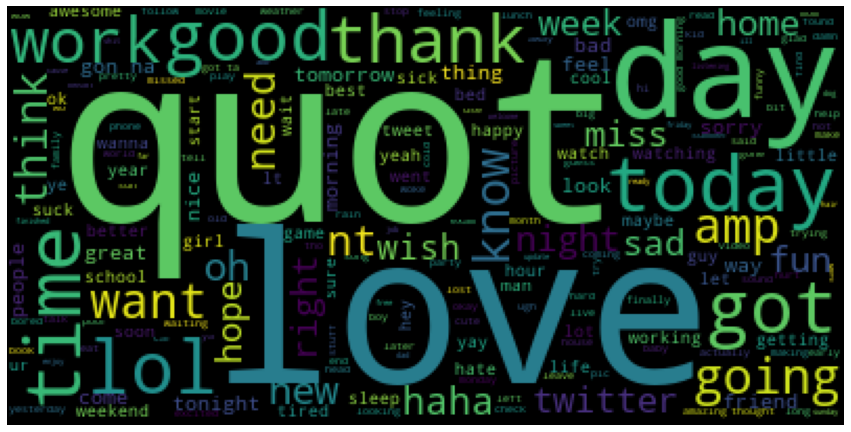

In [44]:
cloud = WordCloud()
cloud = cloud.generate(texts)
plt.figure(figsize=(15,15))
plt.imshow(cloud)
plt.axis('off');

## **Detecting languages**

In [ ]:
!pip install langdetect

In [46]:
from langdetect import detect

In [ ]:
detect('This is an English text') # 'en': Englisg

In [ ]:
detect('Este é um texto em português') # 'pt': Portugues

In [ ]:
detect('Este es un texto en espanõl')    # 'es': Spanish

In [50]:
languages = []
for text in X_test_cleaned:
  if text != '':
    languages.append(detect(text))

In [51]:
np.unique(languages, return_counts=True)

(array(['af', 'ca', 'cs', 'cy', 'da', 'de', 'en', 'es', 'et', 'fi', 'fr',
        'hr', 'hu', 'id', 'it', 'lt', 'lv', 'nl', 'no', 'pl', 'pt', 'ro',
        'sk', 'sl', 'so', 'sq', 'sv', 'sw', 'tl', 'tr', 'vi'], dtype='<U2'),
 array([ 592,   53,   14,  139,  137,   22, 6739,   68,  120,   63,  146,
          21,    8,   86,   97,    9,    8,  206,  155,   58,   19,   61,
          21,   37,  327,   20,   54,   37,  181,   32,   11]))

## **Sentiment analysis with NLTK**

In [ ]:
import nltk
nltk.download('vader_lexicon')

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [55]:
nltk_classifier = SentimentIntensityAnalyzer()

In [57]:
nltk_classifier.polarity_scores('I love this food')

{'compound': 0.6369, 'neg': 0.0, 'neu': 0.323, 'pos': 0.677}

In [56]:
nltk_classifier.polarity_scores('I hate this food')

{'compound': -0.5719, 'neg': 0.649, 'neu': 0.351, 'pos': 0.0}

In [58]:
nltk_classifier.polarity_scores('I have this food')

{'compound': 0.0, 'neg': 0.0, 'neu': 1.0, 'pos': 0.0}

In [59]:
X_train_cleaned[0]

'trying tell husband care twitter lol lol girl life w/o twitter'

In [60]:
nltk_classifier.polarity_scores(X_train_cleaned[0])

{'compound': 0.8316, 'neg': 0.0, 'neu': 0.476, 'pos': 0.524}

In [62]:
X_train_cleaned[20002]

'good little mama hoooooooooooooow dooooooin'

In [63]:
nltk_classifier.polarity_scores(X_train_cleaned[20002])

{'compound': 0.4404, 'neg': 0.0, 'neu': 0.58, 'pos': 0.42}

In [ ]:
for sentence in X_test:
  print(nltk_classifier.polarity_scores(sentence), ' - ', sentence)

##**Sentiment analysis with TF-IDF**

**1. Calculation of TF-IDF for X_train and X_test**

In [65]:
X_train_cleaned[0:5]

['trying tell husband care twitter lol lol girl life w/o twitter',
 'tired want sleep nelson nguyen&lt;333',
 'love music love galaxy 8) listening radio fone',
 'dream kind marinade wings going zesty/ tangy sadly going away party',
 'oh wow congratulations painting sale awesome cat aww']

In [67]:
Y_train[0:5]

array([4, 0, 4, 0, 4])

In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [70]:
X_train_tfidf = vectorizer.fit_transform(X_train_cleaned)

In [71]:
X_train_tfidf.toarray().shape

(38400, 33552)

In [72]:
len(vectorizer.get_feature_names())

33552

In [74]:
def preprocessing_lemma(sentence):
  tokens = []
  tokens = [token.lemma_ for token in nlp(sentence)]
  tokens = ' '.join([element for element in tokens])
  return tokens 

In [75]:
preprocessing_lemma('learn learned learning')

'learn learn learning'

In [76]:
X_train_cleaned_lemma = [preprocessing_lemma(tweet) for tweet in X_train_cleaned]

In [77]:
X_train_tfidf = vectorizer.fit_transform(X_train_cleaned_lemma)

In [78]:
X_train_tfidf.shape

(38400, 30762)

In [80]:
X_test_cleaned_lemma = [preprocessing_lemma(tweet) for tweet in X_test_cleaned]

In [81]:
X_test_tfidf = vectorizer.transform(X_test_cleaned_lemma)

In [82]:
X_test_tfidf.shape

(9600, 30762)

**2. Descision Tree**

In [83]:
# Import decision tree package
from sklearn.tree import DecisionTreeClassifier

In [84]:
classifier = DecisionTreeClassifier()

In [ ]:
classifier.fit(X_train_tfidf, Y_train)

In [87]:
predictions = classifier.predict(X_test_tfidf)

In [88]:
predictions

array([0, 4, 0, ..., 0, 4, 4])

In [90]:
Y_test

array([4, 0, 0, ..., 4, 4, 0])

**3. Result Analysis**

In [91]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [93]:
accuracy_score(Y_test, predictions)

0.6764583333333334

In [95]:
cm = confusion_matrix(Y_test, predictions)
cm

array([[3362, 1436],
       [1670, 3132]])

In [96]:
(3429 + 3082) / 9600

0.6782291666666667

In [98]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.67      0.70      0.68      4798
           4       0.69      0.65      0.67      4802

    accuracy                           0.68      9600
   macro avg       0.68      0.68      0.68      9600
weighted avg       0.68      0.68      0.68      9600

